In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
sns.set_style('whitegrid')

In [2]:
drive.mount("/content/drive/")  #Para acceder a los archivos en drive

Mounted at /content/drive/


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Data/anime.csv')
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [12]:
x = data['rating']
y = data['members']

In [19]:
#Función de ajuste lineal
def w_mat1(x,y):
  X = np.vstack((np.ones_like(x),x)).T
  t = y
  XX = np.matmul (X.T, X)
  invXX = np.linalg.inv (XX)
  Xt = np.matmul (X.T, t)
  W = np.matmul (invXX, Xt)
  return W

W0, W1 = w_mat1(x,y)

In [20]:
x_aux = np.linspace(np.min(x), np.max(x), 1000)

In [23]:
#Función de ajuste cuadrático
def w_mat2(x,y):
  X = np.vstack((np.ones_like(x),x,x**2)).T
  t = y
  XX = np.matmul (X.T, X)
  invXX = np.linalg.inv (XX)
  Xt = np.matmul (X.T, t)
  W = np.matmul (invXX, Xt)
  return W

w0,w1,w2 = w_mat2(x,y)

In [26]:
#Función de ajuste cúbico
def w_mat2(x,y):
  X = np.vstack((np.ones_like(x),x,x**2, x**3)).T
  t = y
  XX = np.matmul (X.T, X)
  invXX = np.linalg.inv (XX)
  Xt = np.matmul (X.T, t)
  W = np.matmul (invXX, Xt)
  return W

wc,wu,wd,wt = w_mat2(x,y)

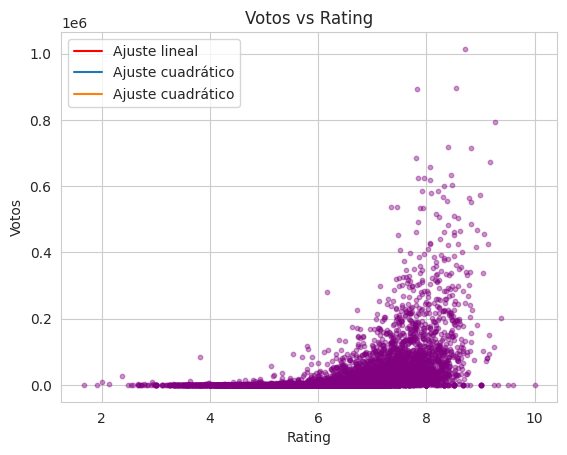

In [30]:
#No entiendo por qué no muestra los ajustes, no encuentro el error :c
plt.scatter(x, y, color = 'purple', s = 10, alpha = 0.4)
plt.plot(x_aux, W0 + W1*x_aux, c = 'red', label = "Ajuste lineal")
plt.plot(x_aux, w0 + w1*x_aux + w2*x_aux**2, label = "Ajuste cuadrático")
plt.plot(x_aux, wc + wu*x_aux + wd*x_aux**2 + wt*x_aux**3, label = "Ajuste cuadrático")
plt.title('Votos vs Rating')
plt.xlabel('Rating')
plt.ylabel('Votos')
plt.legend()

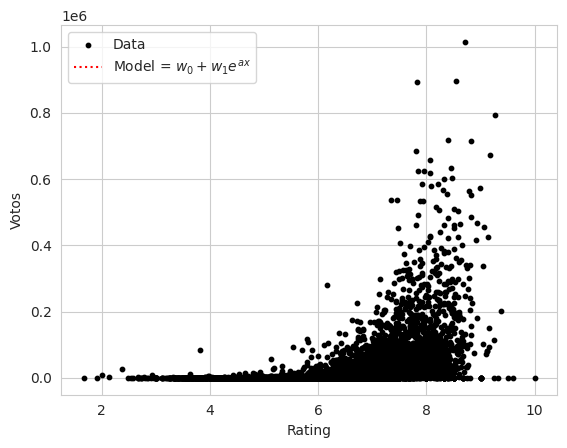

In [29]:
#Para un ajuste exponencial
def w_mat(x, y):

    #Generamos los datos para matriz X, dependiendo del orden de polinomio que necesitemos
    datax = [np.ones_like(x), np.exp(-x/100)]

    X = np.vstack(datax).T
    t = y
    XX = np.matmul(X.T, X)
    invXX = np.linalg.inv(XX)
    Xt = np.matmul(X.T, t)
    W = np.matmul(invXX, Xt)

    return W

b1, b2 = w_mat(x, y)

j = lambda x: b1 + b2*np.exp(-x/100)

plt.scatter(x, y, color = 'black', s = 10, label = 'Data')
plt.plot(x_aux, j(x_aux), ':', color = 'red', label = r'Model = $w_0 + w_1 e^{ax}$')
plt.legend()
plt.xlabel('Rating')
plt.ylabel('Votos');